# AI CA# 5 - Phase 1

## 810100118 - SMahdi HajiSeyedHossein


# MLP from scratch

In this homework, you will code a [Multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) with one hidden layer to classify text data.

Advice:
- As much as possible, please try to make matrix and vector operations (good practice for efficient code)
- If you're not familiar with numpy, check the documentation of `np.max`, `np.clip`, `np.random.randn`, `np.reshape`. FYI the matrix multiplication operator is `@`, and you may want to learn about [broadcasting rules](https://numpy.org/doc/stable/user/basics.broadcasting.html) to see how it deals with tensor operations of different sizes
- You can also check about `torch.clamp`, `torch.nn.Parameter`

## 1. Some utilities and dataset for Part 2

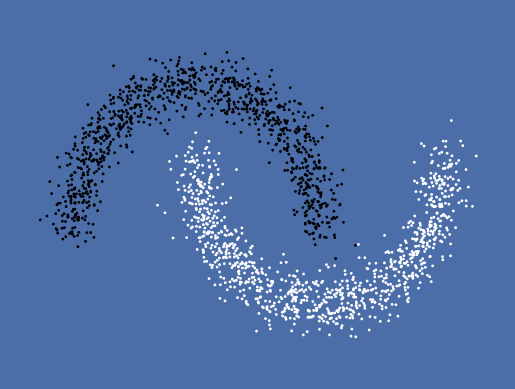

In [396]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plot the dataset
def plot_data(ax, X, Y):
    plt.axis('off')
    ax.scatter(X[:, 0], X[:, 1], s=1, c=Y, cmap='bone')

from sklearn.datasets import make_moons
X, Y = make_moons(n_samples=2000, noise=0.1)

%matplotlib inline
x_min, x_max = -1.5, 2.5
y_min, y_max = -1, 1.5
fig, ax = plt.subplots(1, 1, facecolor='#4B6EA9')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plot_data(ax, X, Y)
plt.show()

In [397]:
# Define the grid on which we will evaluate our classifier
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

to_forward = np.array(list(zip(xx.ravel(), yy.ravel())))

# plot the decision boundary of our classifier
def plot_decision_boundary(ax, X, Y, classifier):
    # forward pass on the grid, then convert to numpy for plotting
  
    Z = classifier.forward(to_forward)
    Z = Z.reshape(xx.shape)
    
    # plot contour lines of the values of our classifier on the grid
    ax.contourf(xx, yy, Z>0.5, cmap='Blues')
    
    # then plot the dataset
    plot_data(ax, X,Y)

## 2. MLP in numpy

Here you need to code your implementation of the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation and the [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function).

In [398]:
class MyReLU(object):
    def forward(self, x):
        # the relu is y_i = max(0, x_i)
        self.x_relu = np.maximum (0 , x )
        return self.x_relu
        
    
    def backward(self, grad_output):
        # the gradient is 1 for the inputs that were above 0, 0 elsewhere
        return grad_output * np.where(self.x_relu > 0, 1, 0)

    
    def step(self, learning_rate):
        # no need to do anything here, since ReLU has no parameters
        pass

class MySigmoid(object):
    def forward(self, x):
        self.x_sig = 1/ (1 + np.exp(-x))
        # the sigmoid is y_i = 1./(1+exp(-x_i))
        return self.x_sig

    def backward(self, grad_output):
        # the partial derivative is e^-x / (e^-x + 1)^2
        return grad_output * self.x_sig * (1 - self.x_sig)
        # sig = self.forward(grad_output)
        # return sig * (1 - sig)

    
    def step(self, learning_rate):
        # no need to do anything here since Sigmoid has no parameters
        pass


Probably a good time to test your functions...

In [399]:
test_relu = MyReLU()
test_relu.forward([0, -1, 0.5, -0.5, 0.8, 1])

array([0. , 0. , 0.5, 0. , 0.8, 1. ])

In [400]:
test_relu.backward(np.ones(1))

array([0., 0., 1., 0., 1., 1.])

In [401]:
test_sig = MySigmoid()

test_sig.forward(np.ones(1))

array([0.73105858])

In [402]:
test_sig.backward(np.ones(1))

array([0.19661193])

A bit more complicated, you need now to implement your linear layer i.e. multiplication by a matrix W and summing with a bias b.

In [403]:
class MyLinear(object):
    def __init__(self, n_input, n_output):
        # initialize two random matrices for W and b (use np.random.randn)
        self.W = np.random.randn(n_input , n_output)
        self.b = np.random.randn(n_output)
        
        
        
    def forward(self, x):
        # save a copy of x, you'll need it for the backward
        # return Wx + b
        
        self.x = x.copy()
        self.z = np.dot(x , self.W) + self.b
        return self.z
    
    
    def backward(self, grad_output):
        # y_i = \sum_j W_{i,j} x_j + b_i
        # d y_i / d W_{i, j} = x_j
        # d loss / d y_i = grad_output[i]
        # so d loss / d W_{i,j} = x_j * grad_output[i]  (by the chain rule)

        self.dW = np.outer(self.x, grad_output)
        self.db = grad_output
        self.dx = np.dot(grad_output, self.W.T)
        return self.dx
        
        
        
        #raise NotImplementedError()
        
        # d y_i / d b_i = 1
        # d loss / d y_i = grad_output[i]
        # YOUR CODE HERE
        #raise NotImplementedError()
        
        # now we need to compute the gradient with respect to x to continue the back propagation
        # d y_i / d x_j = W_{i, j}
        # to compute the gradient of the loss, we have to sum over all possible y_i in the chain rule
        # d loss / d x_j = \sum_i (d loss / d y_i) (d y_i / d x_j)
        # YOUR CODE HERE
        #raise NotImplementedError()
    
    def step(self, learning_rate):
        # update self.W and self.b in the opposite direction of the stored gradients, for learning_rate
        self.W -= learning_rate * self.dW
        self.b -= learning_rate * self.db
        


Code your network. Note that with a Sigmoid layer, you should use the Binary Cross Entropy (BCE) loss.

In [404]:
class Sequential(object):
    def __init__(self):
        # Specify your model's Architecture here (Use your Linear and Activation Functions)
        self.L1 = MyLinear (2 , 50)
        self.L2 = MyLinear (50 , 50)
        self.L3 = MyLinear (50 , 50)
        self.L4 = MyLinear (50 , 50)
        self.L5 = MyLinear (50 , 50)
        self.L6 = MyLinear (50 , 1)
        
        self.AF_sig = MySigmoid ()
        self.AF_rel = MyReLU ()
        self.layers = [self.L1 , self.AF_rel , self.L2 , self.AF_sig , self.L3 , self.AF_sig , self.L4 , self.AF_sig , self.L5 , self.AF_sig , self.L6 , self.AF_sig]
        
        
    def forward(self, x):
        out = x
        for lay in self.layers:
            out = lay.forward(out)
        return out 
        
        
        
    def compute_loss(self, out, label):
        # use the BCE loss
        # -(label * log(output) + (1-label) * log(1-output))
        # save the gradient, and return the loss      
        # beware of dividing by zero in the gradient.
        # split the computation in two cases, one where the label is 0 and another one where the label is 1
        # add a small value (1e-10) to the denominator
        epsilon = 1e-10
        loss = (-label) * np.log(out + epsilon) - (1 - label) * np.log(1 - out + epsilon)
        self.theGradient = (-label) / (out + epsilon) + (1 - label) / (1 - out + epsilon)
        print (loss)
        return loss
        
#         loss = -(label * np.log(out + 1e-10) + (1 - label) * np.log(1 - out + 1e-10))
#         self.theGradient = -(label / (out + 1e-10) - (1 - label) / (1 - out + 1e-10))
#         return loss

    def backward(self):
        # apply backprop sequentially, starting from the gradient of the loss
        theG = self.theGradient
        for layer in reversed(self.layers):
            theG = layer.backward(theG)
        return theG
            
    def step(self, learning_rate):
        # take a gradient step for each layers
        for layer in self.layers:
            layer.step(learning_rate)
        

In [405]:
# define your network with your Sequential Class
model = Sequential()

model.L1.W

array([[ 0.12181624, -0.28865709, -1.10365892,  1.29370723, -0.59794109,
         0.20480476, -0.68126821, -0.11303365, -0.18781666,  0.44889829,
         1.75914537, -0.48542232,  1.60685783, -0.67088395, -0.45142835,
        -0.54805692, -0.23826749,  1.41520568,  0.08416697, -0.62104068,
        -0.59025587, -0.68627194, -1.4917811 ,  1.50558516,  0.1236336 ,
        -0.00339685,  0.99254069, -0.66431724,  0.09561192,  0.3380463 ,
         0.7810627 ,  0.25326266, -1.04003185,  0.3674099 , -1.52825032,
        -0.06761438,  1.10845666, -1.09671989,  0.4195715 ,  0.83652532,
         0.79502584, -0.56373429, -0.1371975 , -0.17831873, -0.76586378,
         0.38777609,  1.384844  ,  0.25641578, -1.23488981,  0.07665572],
       [-0.38509143, -0.40320599,  0.09716102,  0.74431282, -0.02396421,
        -0.32419847, -0.23794626,  0.50277298,  0.49466185, -0.36833008,
         2.44774573, -0.80375019, -1.73500945,  0.1555566 ,  0.1253281 ,
         0.18416701, -0.77254614,  0.77798885,  0.

In [406]:
losses = []
learning_rate = 1e-2
epochs = 10

for epoch in range(epochs):
    for it in range(len(X)):
        # pick a random example idx
        idx = np.random.randint(len(X)-1)
        

        # select the corresponding example and label
        example = X[idx]
        label = Y[idx]

        # do a forward pass on the example
        # YOUR CODE HERE
        out = model.forward(example)

        # compute the loss according to your output and the label
        # YOUR CODE HERE
        loss = model.compute_loss(out, label)
        losses.append(loss)
        
        # backward pass
        # YOUR CODE HERE
        model.backward()
        
        # gradient step
        # YOUR CODE HERE
        model.step(learning_rate)

[1.7654206]
[2.28260093]
[0.45770786]
[0.32246128]
[0.93527954]
[0.3672825]
[0.36172812]
[0.8545522]
[1.40622615]
[0.79986284]
[0.71235754]
[1.07035826]
[0.5711893]
[0.5190308]
[1.15365141]
[0.54972618]
[0.48379085]
[0.43634341]
[0.75188814]
[0.41718673]
[1.30476218]
[0.94936132]
[0.42685591]
[1.0539026]
[0.43077634]
[0.76865815]
[0.56527591]
[1.41124365]
[0.57162177]
[0.7718378]
[0.56458412]
[0.481039]
[0.71113868]
[0.30649153]
[0.2411245]
[0.4897174]
[0.73030553]
[0.51247279]
[0.33059076]
[0.27472553]
[0.30593647]
[0.06901612]
[1.15416032]
[0.28102933]
[0.0235872]
[0.06404766]
[0.06747531]
[0.63624815]
[0.38206328]
[0.57828096]
[0.56912067]
[0.58363742]
[0.02729086]
[0.01025626]
[0.53382401]
[0.06352009]
[0.22971044]
[0.25791997]
[0.2212199]
[0.40723819]
[0.27242436]
[0.39796982]
[0.1382673]
[0.23349801]
[0.50374]
[0.29917942]
[0.03895708]
[0.45386625]
[0.80868585]
[0.26630934]
[0.42469205]
[0.10433482]
[0.19672602]
[0.11292252]
[0.44414422]
[1.30605255]
[0.22793082]
[0.05208269]
[0.

[0.5655921]
[0.25267165]
[0.31724652]
[0.03633615]
[2.14386548]
[0.07025215]
[0.05795222]
[0.06497595]
[0.54298846]
[0.10500921]
[0.04078132]
[0.34888691]
[0.11934003]
[0.08655739]
[0.22823258]
[0.05966681]
[0.06813459]
[0.05339656]
[0.05711217]
[0.08323666]
[0.06576287]
[0.07216256]
[0.05575637]
[0.6957438]
[0.03691272]
[0.13498804]
[0.02260655]
[0.18020195]
[0.03833506]
[0.08490744]
[0.21863899]
[0.15407478]
[0.10278015]
[0.43890131]
[0.10480894]
[0.07255805]
[0.15178389]
[0.09970917]
[0.06442192]
[0.07443406]
[0.07285018]
[0.13032833]
[0.20204854]
[0.09369426]
[0.07623334]
[0.05688041]
[0.07624882]
[0.04507667]
[0.0685755]
[0.04479238]
[1.6337166]
[0.03450296]
[0.55865444]
[0.02669324]
[0.04233528]
[0.02350516]
[0.0357483]
[0.71538537]
[0.28468982]
[0.07107241]
[0.08435033]
[0.01058022]
[0.19499959]
[0.01888678]
[0.02043487]
[0.68388909]
[0.13122911]
[0.36892037]
[0.02758871]
[0.07962565]
[0.07968955]
[0.04233646]
[0.16031477]
[0.14970029]
[1.30011832]
[0.03379961]
[0.06385311]
[0.2

[0.00889267]
[0.09604997]
[0.09424287]
[0.27766224]
[0.10381322]
[0.04869794]
[0.08708788]
[0.05311215]
[0.4806634]
[0.07792715]
[0.07951186]
[0.08540988]
[0.07289216]
[0.02200715]
[0.78864594]
[0.28065227]
[0.08727068]
[0.03932411]
[0.03027863]
[0.06199037]
[0.75264368]
[0.09300209]
[0.07535834]
[0.04399077]
[0.02997209]
[0.03374571]
[0.06882054]
[0.03751004]
[0.00469503]
[0.00484082]
[0.05746758]
[0.00494304]
[2.29327488]
[0.05878852]
[0.02495897]
[0.08042892]
[0.10764627]
[0.00737034]
[0.13119999]
[0.0681018]
[0.05572504]
[0.07373035]
[0.25540881]
[0.06685857]
[0.00701473]
[0.08041689]
[0.04491114]
[0.0063739]
[0.05719134]
[3.06666153]
[0.07140527]
[0.03049865]
[0.11234152]
[0.00827612]
[0.05485503]
[0.26712678]
[0.02572629]
[1.01167716]
[0.03151592]
[0.02010787]
[0.02550589]
[0.03946412]
[0.04589794]
[0.02698985]
[0.03446177]
[0.23703158]
[0.28706305]
[0.03122215]
[0.02221651]
[0.02098904]
[0.05126856]
[0.04487947]
[0.066546]
[0.01923539]
[0.03454728]
[0.01124294]
[0.0242238]
[0.03

[0.01350601]
[0.01339192]
[0.13481614]
[0.0115837]
[0.93496581]
[0.08377674]
[0.0593915]
[0.01439782]
[0.17804322]
[0.08795663]
[0.01737809]
[0.02076658]
[0.16684236]
[0.03933458]
[0.01984739]
[0.06718484]
[0.1421857]
[0.04676689]
[0.06615656]
[0.08459634]
[0.01348185]
[3.58665081]
[0.06792931]
[0.09558847]
[0.01372897]
[0.08592084]
[0.04151269]
[0.05645791]
[0.57536082]
[0.01706063]
[0.00964769]
[0.01412347]
[0.26630016]
[0.04827222]
[0.01265438]
[0.18072944]
[0.10649364]
[0.01849473]
[0.02468458]
[0.00984735]
[0.01543999]
[0.02467882]
[0.01338479]
[0.01387978]
[0.07033178]
[0.01399515]
[0.00911951]
[0.01642931]
[0.12328326]
[0.11341289]
[0.01270162]
[0.0152156]
[0.12269841]
[0.1361642]
[0.00840926]
[0.04676813]
[0.04719362]
[0.00915367]
[0.03754457]
[0.10823408]
[0.01512916]
[0.04935499]
[0.03109576]
[0.01151435]
[0.40035188]
[0.01139845]
[0.1313566]
[0.15131848]
[0.07611214]
[0.13007303]
[0.01217407]
[0.01318466]
[0.00937147]
[0.02550443]
[0.03122871]
[0.01476408]
[0.0154211]
[0.015

[0.02772868]
[0.07606712]
[0.01754491]
[0.01442726]
[0.00394589]
[0.0290724]
[0.00560391]
[0.07212918]
[0.02416574]
[0.01841284]
[0.10355508]
[0.02294704]
[0.08043288]
[0.66308877]
[0.06250255]
[0.07336149]
[0.05618793]
[0.7797811]
[0.02315124]
[0.00761761]
[0.00351729]
[0.0144545]
[0.01412691]
[0.08211847]
[0.23322575]
[0.11593431]
[0.01749749]
[0.03792967]
[0.0492947]
[0.02869028]
[0.02171229]
[0.02577345]
[0.0280151]
[0.06998572]
[0.01733165]
[0.08474341]
[0.01125117]
[0.02171583]
[0.01711238]
[0.04261696]
[0.10333782]
[0.01221243]
[0.03766195]
[0.01138947]
[0.05597446]
[0.01712942]
[0.00550008]
[0.01534583]
[0.04824173]
[0.01812021]
[0.09625545]
[0.00788946]
[0.82714873]
[0.01161153]
[0.00708832]
[1.21427343]
[0.01507805]
[0.00982108]
[0.01432777]
[0.01155568]
[0.01249257]
[0.00482724]
[0.02436481]
[0.03468967]
[0.02012004]
[0.02938274]
[0.00605078]
[0.01216954]
[0.01385213]
[0.0106995]
[0.04950314]
[0.03866707]
[0.00484969]
[0.01030589]
[0.04451867]
[0.03347845]
[0.02582683]
[0.01

[0.00420991]
[0.0336398]
[0.00625666]
[0.0222471]
[0.01183811]
[0.01834441]
[0.01962218]
[0.03344669]
[0.00863614]
[0.00540582]
[0.01042378]
[0.04867948]
[0.06169873]
[0.02558915]
[0.0256295]
[0.01133476]
[0.02725109]
[0.02006601]
[0.00606584]
[0.02178248]
[0.01206036]
[0.01375863]
[0.02866944]
[0.05050593]
[0.01240273]
[0.01102525]
[0.08672827]
[0.02270469]
[0.02700475]
[0.00940259]
[0.01959562]
[0.01187395]
[0.00879109]
[0.02401844]
[0.01928556]
[0.01297163]
[0.01926393]
[0.00877291]
[0.114968]
[0.02176234]
[0.01368215]
[0.0272077]
[0.0076811]
[0.02553481]
[0.04779863]
[0.00601573]
[0.00522379]
[0.00836236]
[0.02467396]
[0.03110992]
[0.00506917]
[0.01641401]
[0.03468436]
[0.01043741]
[0.00546987]
[0.01456694]
[0.02897439]
[0.01173296]
[0.03041003]
[0.00951504]
[0.00738495]
[0.00366088]
[0.01056556]
[0.00562802]
[0.04577042]
[0.00515959]
[0.0253788]
[0.03144661]
[0.03308743]
[0.03185333]
[0.01393956]
[0.0236101]
[0.02865659]
[0.03622171]
[0.03655198]
[0.02766487]
[0.00687461]
[0.00710

[0.04617945]
[0.01066629]
[0.00614926]
[0.02485089]
[0.00397364]
[0.01563288]
[0.0040607]
[0.0047093]
[0.00329162]
[0.00215708]
[0.0227107]
[0.0266321]
[0.04331714]
[0.02678302]
[0.03744178]
[0.00237136]
[0.02166326]
[0.14790167]
[0.01027088]
[0.34949231]
[0.01202382]
[0.01511944]
[0.00767779]
[0.05929994]
[0.00746801]
[0.0509742]
[0.01688024]
[0.01653286]
[0.00394964]
[0.02491643]
[0.00789273]
[0.02466572]
[0.00961637]
[0.01160374]
[0.00858091]
[0.01699783]
[0.01945052]
[0.00529867]
[0.01483298]
[0.03371401]
[0.02531103]
[0.02582401]
[0.02326174]
[0.0187599]
[0.00790599]
[0.02074798]
[0.06752739]
[0.00775754]
[0.0307538]
[0.03953273]
[0.03321129]
[0.00900863]
[0.06203296]
[0.01279666]
[0.06045292]
[0.03421486]
[0.01320348]
[0.04848243]
[0.14214865]
[0.03114314]
[0.01683735]
[0.01031432]
[0.01035939]
[0.01119989]
[0.03211177]
[0.0127048]
[0.01222192]
[0.01037536]
[0.03702574]
[0.00709424]
[0.00831326]
[0.00611867]
[0.00586821]
[0.02232824]
[0.06289706]
[0.02932163]
[0.00524195]
[0.0039

[0.00712999]
[0.00775495]
[0.01517805]
[0.01111727]
[0.01423473]
[0.01787954]
[0.00308992]
[0.00874418]
[0.00964501]
[0.00293924]
[0.00641134]
[0.00548346]
[0.00432868]
[0.01512042]
[0.00391756]
[0.01528929]
[0.00556586]
[0.00693752]
[0.00272762]
[0.00505637]
[0.00464139]
[0.00938467]
[0.0055836]
[0.04381786]
[0.00580192]
[0.02933238]
[0.0177219]
[0.00828753]
[0.01085533]
[0.01896481]
[0.01894914]
[0.00715467]
[0.00967635]
[0.00373252]
[0.01518008]
[0.02043971]
[0.00959802]
[0.01755389]
[0.0058638]
[0.0040413]
[0.01835213]
[0.0202754]
[0.03904523]
[0.01891381]
[0.0071518]
[0.00782482]
[0.10054855]
[0.0040941]
[0.01083905]
[0.01095133]
[0.00502699]
[0.00277148]
[0.01661162]
[0.00489096]
[0.01569237]
[0.00684954]
[0.00517624]
[0.00912155]
[0.00377277]
[0.01849382]
[0.03977851]
[0.11123417]
[0.00468862]
[0.00302138]
[0.00655807]
[0.0386129]
[0.01108899]
[0.00333184]
[0.01563765]
[0.00408563]
[0.0057973]
[0.00899437]
[0.00705678]
[0.00675725]
[0.00723849]
[0.00895063]
[0.00395388]
[0.00985

[0.00398681]
[0.05674997]
[0.01262504]
[0.00470945]
[0.01901569]
[0.01080942]
[0.00355356]
[0.00349285]
[0.00667534]
[0.00263671]
[0.00370831]
[0.01217053]
[0.00786878]
[0.01374233]
[0.00385374]
[0.0179423]
[0.02305826]
[0.00594793]
[0.01594793]
[0.00384794]
[0.00877038]
[0.00572973]
[0.00448239]
[0.0391236]
[0.01004624]
[0.00366802]
[0.0072514]
[0.00466121]
[0.01161103]
[0.00356353]
[0.0041262]
[0.00394279]
[0.00347021]
[0.0091216]
[0.00365852]
[0.04251909]
[0.0184253]
[0.00269735]
[0.01370485]
[0.02803551]
[0.00801955]
[0.00588027]
[0.00924664]
[0.00429224]
[0.01172333]
[0.17961064]
[0.00272709]
[0.02462035]
[0.02261167]
[0.00244373]
[0.00385178]
[0.00970522]
[0.00477074]
[0.00304637]
[0.00850654]
[0.01661293]
[0.00282197]
[0.01071905]
[0.00338269]
[0.00471598]
[0.01067656]
[0.00439411]
[0.00678967]
[0.00867144]
[0.0046731]
[0.02994959]
[0.43236215]
[0.00631059]
[0.00834938]
[0.05967425]
[0.0127215]
[0.03364599]
[0.04918694]
[0.00651346]
[0.00340489]
[0.00750082]
[0.00282969]
[0.0200

[0.01207577]
[0.01746172]
[0.00934919]
[0.00480145]
[0.01913262]
[0.01467097]
[0.00935553]
[0.01310243]
[0.00881223]
[0.03572211]
[0.02142581]
[0.02531838]
[0.02015822]
[0.02734786]
[0.02106019]
[0.00517519]
[0.00541788]
[0.01454109]
[0.01153439]
[0.00765652]
[0.00924593]
[0.00447178]
[0.01932455]
[0.00724429]
[0.02569718]
[0.00384403]
[0.27318393]
[0.00353131]
[0.00649601]
[0.00397048]
[0.0026159]
[0.00429984]
[0.00633094]
[0.00462309]
[0.00626562]
[0.00622021]
[0.00998481]
[0.0153776]
[0.01149975]
[0.01985468]
[0.10155584]
[0.00337594]
[0.01374936]
[0.02783353]
[0.00810253]
[0.01474591]
[0.01029514]
[0.0035869]
[0.00902136]
[0.0087813]
[0.02309334]
[0.00728062]
[0.00395773]
[0.010466]
[0.02089048]
[0.01142496]
[0.00629058]
[0.01065281]
[0.01248768]
[0.00411747]
[0.00278077]
[0.00703655]
[0.01654849]
[0.00842101]
[0.01607718]
[0.00698198]
[0.02596139]
[0.00310969]
[0.01640386]
[0.02107885]
[0.01142937]
[0.01423497]
[0.00360229]
[0.01501926]
[0.00571006]
[0.00893771]
[0.00546215]
[0.00

[0.04127832]
[0.02375574]
[0.00985832]
[0.00528372]
[0.00956252]
[0.00785221]
[0.00747253]
[0.00303545]
[0.01458528]
[0.00901628]
[0.01140309]
[0.00473779]
[0.02208585]
[0.02557738]
[0.09083566]
[0.00662742]
[0.02025019]
[0.01415582]
[0.00773676]
[0.00753978]
[0.00291572]
[0.01679101]
[0.03010037]
[0.0012143]
[0.00902761]
[0.01206288]
[0.00383003]
[0.08134215]
[0.00451357]
[0.02717673]
[0.00377566]
[0.02502284]
[0.03124144]
[0.00290309]
[0.01102485]
[0.01071105]
[0.01200762]
[0.00248275]
[0.00583004]
[0.00637757]
[0.0024647]
[0.00897447]
[0.00265867]
[0.01540674]
[0.02482857]
[0.00696874]
[0.00911744]
[0.00951206]
[0.01412105]
[0.02743914]
[0.00768954]
[0.01455932]
[0.03028126]
[0.00494738]
[0.00779799]
[0.01530135]
[0.05931368]
[0.01867263]
[0.00558831]
[0.03414225]
[0.0096924]
[0.00493918]
[0.01476556]
[0.00704034]
[0.00240075]
[0.01064412]
[0.00655334]
[0.03716618]
[0.00373843]
[0.01638975]
[0.00292584]
[0.01125931]
[0.00891872]
[0.01795927]
[0.00358341]
[0.00376011]
[0.00928283]
[0

[0.21655152]
[0.00987011]
[0.00705655]
[0.01293678]
[0.00471788]
[0.00476209]
[0.00776082]
[0.01284473]
[0.00211448]
[0.00808432]
[0.00724519]
[0.01005875]
[0.00973696]
[0.00279186]
[0.00341499]
[0.02098671]
[0.00796676]
[0.01033289]
[0.01004709]
[0.00561869]
[0.02884117]
[0.01977632]
[0.01017804]
[0.00429963]
[0.00412908]
[0.00483167]
[0.00531227]
[0.01872572]
[0.00670696]
[0.00732837]
[0.00695436]
[0.01122521]
[0.00213222]
[0.00451612]
[0.00475866]
[0.00442436]
[0.00379133]
[0.01159208]
[0.00440018]
[0.00629568]
[0.0058569]
[0.01773696]
[0.00895103]
[0.00719774]
[0.0104079]
[0.00488375]
[0.00856646]
[0.02398486]
[0.0347574]
[0.00287162]
[0.00786796]
[0.00949249]
[0.0378429]
[0.00482744]
[0.01458343]
[0.02723375]
[0.0087348]
[0.01824579]
[0.00712653]
[0.00840939]
[0.00209108]
[0.00603246]
[0.00856589]
[0.00267503]
[0.01520887]
[0.01651074]
[0.00523776]
[0.00566357]
[0.017795]
[0.01335068]
[0.00664567]
[0.02447289]
[0.00560202]
[0.00962244]
[0.01735212]
[0.00297277]
[0.01754661]
[0.009

[0.00443103]
[0.02794943]
[0.00445646]
[0.0161588]
[0.00863057]
[0.00765043]
[0.02709981]
[0.01070464]
[0.02835092]
[0.03290624]
[0.0104057]
[0.01385984]
[0.00622826]
[0.01321869]
[0.04277042]
[0.0034102]
[0.01392508]
[0.00252876]
[0.26251534]
[0.00537078]
[0.00260689]
[0.00629227]
[0.0113945]
[0.00458408]
[0.0094451]
[0.00633703]
[0.00366263]
[0.00359055]
[0.00859725]
[0.00302639]
[0.0110832]
[0.01068173]
[0.00805149]
[0.00444899]
[0.00389726]
[0.00660424]
[0.00385256]
[0.01506388]
[0.00973611]
[0.00303241]
[0.00432609]
[0.01530105]
[0.01220775]
[0.02277008]
[0.00633667]
[0.00839427]
[0.00357004]
[0.00681955]
[0.00443243]
[0.0055664]
[0.0032403]
[0.01575214]
[0.01379798]
[0.01510811]
[0.00189721]
[0.0114451]
[0.01675244]
[0.00691933]
[0.04322417]
[0.00457206]
[0.00444557]
[0.01058235]
[0.00540484]
[0.0104637]
[0.00307008]
[0.0137407]
[0.00344772]
[0.00166121]
[0.00596957]
[0.00444746]
[0.00401378]
[0.00188117]
[0.00259419]
[0.0052768]
[0.00631398]
[0.0099973]
[0.01346905]
[0.00517555]

[0.00860278]
[0.02887181]
[0.00817804]
[0.0037736]
[0.01119711]
[0.00724477]
[0.00355122]
[0.01060311]
[0.00101846]
[0.00114345]
[0.01245358]
[0.00067252]
[0.0079013]
[0.01059142]
[0.00088096]
[0.00124878]
[0.00187155]
[0.01040536]
[0.00065528]
[0.00686055]
[0.00646692]
[0.00610982]
[0.04098273]
[0.00776454]
[0.20164918]
[0.0023438]
[0.01546098]
[0.00889187]
[0.00437945]
[0.00811107]
[0.03584809]
[0.07443985]
[0.01342457]
[0.01596597]
[0.00537299]
[0.01140395]
[0.00500212]
[0.01170504]
[0.00206455]
[0.0053551]
[0.00802563]
[0.00869643]
[0.00220764]
[0.00584174]
[0.00212483]
[0.03300788]
[0.02173605]
[0.00272221]
[0.00680888]
[0.01085572]
[1.00728589]
[0.00425645]
[0.01311757]
[0.01647111]
[0.0166735]
[0.0236305]
[0.00191337]
[0.01592795]
[0.00137868]
[0.01715473]
[0.00185277]
[0.00200197]
[0.00211452]
[0.00041733]
[0.05074087]
[0.04566299]
[0.0429314]
[0.00180237]
[4.81642973]
[0.03448006]
[0.00114441]
[0.00432123]
[0.09353424]
[0.00195071]
[0.01410181]
[0.00085488]
[0.06627988]
[0.000

[0.0006525]
[0.00160145]
[0.00646043]
[0.00727912]
[0.00268967]
[0.00350379]
[0.002243]
[0.00441301]
[0.00319502]
[0.00740459]
[0.00717519]
[0.02358618]
[0.00414205]
[0.00519619]
[0.00914273]
[0.00394207]
[0.00882445]
[0.00949901]
[0.00569827]
[0.00542064]
[0.00582943]
[0.00299414]
[0.00117722]
[0.00370581]
[0.00599692]
[0.00411182]
[0.00273582]
[0.00596495]
[0.00416411]
[0.00328511]
[0.00294179]
[0.0074846]
[0.00321547]
[0.00153376]
[0.00182073]
[0.00312927]
[0.00559601]
[0.00321491]
[0.00345592]
[0.01017484]
[0.02099674]
[0.00165613]
[0.00181281]
[0.00165462]
[0.00265523]
[0.00316729]
[0.01320558]
[0.00497552]
[0.00637521]
[0.00570211]
[0.00445248]
[0.00603815]
[0.00304713]
[0.0051669]
[0.00092441]
[0.00350429]
[0.00600496]
[0.00925827]
[0.01100914]
[0.00279682]
[0.00319024]
[0.00642819]
[0.00430782]
[0.00724892]
[0.00698613]
[0.00466236]
[0.00472076]
[0.00094707]
[0.00664511]
[0.00371662]
[0.00212356]
[0.00334835]
[0.00958869]
[0.00319815]
[0.01414125]
[0.00338438]
[0.00582768]
[0.0

[0.00127073]
[0.00263485]
[0.00672925]
[0.00118077]
[0.00170393]
[0.00535818]
[0.00135087]
[0.00325482]
[0.00139236]
[0.00115716]
[0.0011769]
[0.00115974]
[0.00136963]
[0.00068942]
[0.01028399]
[0.00656713]
[0.00721518]
[0.00134328]
[0.00464071]
[0.0029579]
[0.00207018]
[0.00923157]
[0.01618974]
[0.00661075]
[0.00460226]
[0.00189787]
[0.00229809]
[0.00178442]
[0.00213953]
[0.0018327]
[0.00286642]
[0.01253393]
[0.00803863]
[0.00351424]
[0.00070979]
[0.0012244]
[0.00202683]
[0.00081807]
[0.00301447]
[0.0008926]
[0.02315489]
[0.00140194]
[0.00148593]
[0.30876619]
[0.00137012]
[0.00055222]
[0.00359354]
[0.00766538]
[0.00278237]
[0.00335823]
[0.0005538]
[0.00282086]
[0.00305908]
[0.0037942]
[0.00834159]
[0.00369725]
[0.00650841]
[0.00543797]
[0.00268148]
[0.00361638]
[0.00304027]
[0.0693513]
[0.00227485]
[0.00184155]
[0.03062104]
[0.00150895]
[0.00227876]
[0.00184891]
[0.00239717]
[0.00152808]
[0.00406196]
[0.00122539]
[0.00569752]
[0.02630277]
[0.00404691]
[0.00388635]
[0.00159178]
[0.0038

[0.00478083]
[0.00791197]
[0.00503554]
[0.00218467]
[0.00475477]
[0.00199412]
[0.02927696]
[0.00397609]
[0.00174224]
[0.01664901]
[0.00176329]
[0.00318868]
[0.00225387]
[0.00059216]
[0.00156993]
[0.02839939]
[0.02462375]
[0.00342848]
[0.00194978]
[0.00392935]
[0.00160108]
[0.00194459]
[0.02021521]
[0.00189297]
[0.00233846]
[0.00551031]
[0.00712298]
[0.0049764]
[0.02253646]
[0.00517099]
[0.00216779]
[0.00105493]
[0.0025076]
[0.00090369]
[0.00663054]
[0.00319391]
[0.00550744]
[0.00613784]
[0.00922837]
[0.00315887]
[0.003734]
[0.00925325]
[0.03114221]
[0.00306803]
[0.00895877]
[0.00342086]
[0.0028805]
[0.01143828]
[0.00592415]
[0.0030838]
[0.01570144]
[0.01065912]
[0.0110979]
[0.03337534]
[0.02275207]
[0.00329628]
[0.00310715]
[0.00203909]
[0.20938496]
[0.00088312]
[0.00732964]
[0.00208483]
[0.00223686]
[0.00454941]
[0.00303568]
[0.00528005]
[0.01587517]
[0.00274235]
[0.002762]
[0.00997028]
[0.00317285]
[0.00113731]
[0.00515742]
[0.00810092]
[0.00283192]
[0.0093451]
[0.00840389]
[0.002865

[0.00937152]
[0.00035533]
[0.0099854]
[0.0030608]
[0.09017801]
[0.00028502]
[0.02343371]
[0.01663532]
[0.00228744]
[0.00336265]
[0.02103867]
[0.00356092]
[0.00247046]
[1.74707021]
[0.00185787]
[0.00674161]
[0.01796089]
[0.00187569]
[0.00807652]
[0.01390653]
[0.51094752]
[0.00266123]
[0.00650216]
[0.00495931]
[0.0004902]
[0.00604808]
[0.01426115]
[0.00546176]
[0.03427677]
[0.00131678]
[0.00067425]
[0.02434531]
[0.01112451]
[0.00074692]
[0.0026381]
[0.01464497]
[0.02280234]
[0.01857684]
[0.01723654]
[0.0103349]
[0.00056994]
[0.03862625]
[0.00041412]
[0.00275069]
[0.0041659]
[0.0035916]
[0.00874062]
[0.03198936]
[0.05020938]
[0.00040817]
[0.009985]
[0.00203295]
[0.00039894]
[0.02555117]
[0.0021626]
[0.03060522]
[0.00150386]
[0.00210189]
[0.04231285]
[0.01188657]
[0.00198363]
[0.00190314]
[0.01202926]
[0.00361157]
[0.00633277]
[0.00337754]
[0.01339805]
[0.00648565]
[0.02028943]
[0.00285042]
[0.00053859]
[0.00233104]
[0.00745746]
[0.00350205]
[0.01850645]
[0.06244139]
[0.02258783]
[0.000640

[0.00142684]
[0.00194964]
[0.00595303]
[0.0021456]
[0.01079416]
[0.00189404]
[0.00218395]
[0.00317457]
[0.001753]
[0.00134913]
[0.00152546]
[0.00489497]
[0.00148538]
[0.01075611]
[0.01386214]
[0.00219367]
[0.01043626]
[0.0008839]
[0.00207002]
[0.00217538]
[0.00155965]
[0.00508759]
[0.00160975]
[0.00166389]
[0.00360801]
[0.0098487]
[0.00118007]
[0.00090981]
[0.0021902]
[0.00167641]
[0.0015721]
[0.00148202]
[0.00163405]
[0.00161711]
[0.00084909]
[0.00285259]
[0.01495592]
[0.00509888]
[0.00211693]
[0.01553816]
[0.00559655]
[0.01157552]
[0.00234572]
[0.00163865]
[0.00310959]
[0.03037017]
[0.00834305]
[0.00806714]
[0.00242595]
[0.01703522]
[0.00223419]
[0.00348797]
[0.03841788]
[0.00442915]
[0.00663994]
[0.00286702]
[0.00231517]
[0.00169094]
[0.00325637]
[0.00188262]
[0.00088224]
[0.00102621]
[0.0156134]
[0.00361736]
[0.00156012]
[0.00160525]
[0.01023081]
[0.00220606]
[0.01001733]
[0.00234197]
[0.0017153]
[0.00188528]
[0.01441511]
[0.03019475]
[0.00161986]
[0.00162183]
[0.00159063]
[0.00161

[0.01150353]
[0.02163734]
[0.0207192]
[0.00382924]
[0.001911]
[0.02625566]
[0.00177002]
[0.01171821]
[0.00338319]
[0.00219954]
[0.00288734]
[0.00341459]
[0.01192746]
[0.00307872]
[0.00279712]
[0.0039398]
[0.02210893]
[0.00910285]
[0.00408863]
[0.00290386]
[0.00574629]
[0.01321528]
[0.01601084]
[0.00321785]
[0.0037365]
[0.02339466]
[0.00385659]
[0.01002888]
[0.00222358]
[0.00191044]
[0.00416339]
[0.00459286]
[0.00291281]
[0.00306469]
[0.00394297]
[0.00227099]
[0.00394241]
[0.0029331]
[0.0019461]
[0.02148703]
[0.01066026]
[0.00416105]
[0.01390177]
[0.0079175]
[0.00794949]
[0.00989558]
[0.00196643]
[0.00415564]
[0.00407543]
[0.00337828]
[0.0032722]
[0.00819423]
[0.00411203]
[0.01905598]
[0.01401168]
[0.01828951]
[0.00345549]
[0.00567058]
[0.00513423]
[0.02556632]
[0.03708496]
[0.00332012]
[0.00366143]
[0.00288984]
[0.00285233]
[0.00871011]
[0.00409968]
[0.00348212]
[0.00756908]
[0.00320486]
[0.01009294]
[0.00373282]
[0.00374672]
[0.00182858]
[0.01457435]
[0.01370058]
[0.0132519]
[0.003637

[0.00181431]
[0.00176609]
[4.77084618]
[0.00264575]
[0.13745935]
[0.02637421]
[0.29634917]
[0.12924486]
[0.05750443]
[0.00330618]
[0.00103823]
[0.00363061]
[0.0174582]
[0.09650982]
[0.02322622]
[0.01731475]
[0.00327744]
[0.0080624]
[0.12980088]
[0.10447031]
[0.05799652]
[0.01261089]
[0.00055161]
[0.03166914]
[0.00363732]
[0.05785382]
[0.01139472]
[0.00111281]
[0.00351524]
[0.08428275]
[0.00037169]
[0.00182163]
[0.00113838]
[0.01509966]
[0.00278441]
[0.1627829]
[0.0002541]
[0.08585149]
[0.2173893]
[0.0049782]
[0.01401738]
[0.01097103]
[0.01673535]
[0.00133615]
[0.00028726]
[0.00868088]
[4.85148029]
[0.02529082]
[0.00081289]
[0.00143228]
[0.00057483]
[0.02027521]
[0.00354277]
[0.00534128]
[0.00387013]
[0.00071327]
[0.00664166]
[0.11950788]
[0.00148952]
[0.04792648]
[0.00535089]
[0.00212534]
[0.00125164]
[0.22117667]
[0.01998084]
[0.00297413]
[0.00050191]
[0.00435181]
[0.02901201]
[0.01873288]
[0.08228075]
[0.02546216]
[0.06235445]
[0.15923863]
[0.00277326]
[0.14321636]
[0.13221682]
[0.00

[0.00094052]
[0.01796765]
[0.0220012]
[0.13366294]
[0.03228102]
[0.05836508]
[0.0001745]
[0.05705345]
[0.03235881]
[0.00116543]
[0.00019047]
[0.00112277]
[0.00107792]
[0.00340981]
[0.1711289]
[0.00036951]
[0.00065259]
[0.03557306]
[0.00072009]
[0.00267001]
[0.00019818]
[0.01562578]
[0.00195068]
[0.00035523]
[0.04802582]
[0.00816073]
[0.00023708]
[0.00850624]
[0.00044153]
[0.00040106]
[0.00264297]
[0.05102056]
[0.00753054]
[0.00048406]
[0.00178134]
[2.89223723]
[0.01533883]
[0.07659952]
[0.00546083]
[0.01658135]
[0.00024108]
[0.00213707]
[0.01661597]
[0.00034645]
[0.0330766]
[0.02232581]
[0.00102467]
[0.02044864]
[0.30970266]
[0.00014677]
[0.03619639]
[0.00012975]
[0.07405186]
[0.00082568]
[0.00029411]
[0.02207763]
[0.01733622]
[0.00014696]
[0.00014985]
[0.00029394]
[0.00074992]
[0.00280264]
[0.00047829]
[0.00351476]
[0.0003364]
[0.00028916]
[0.00027124]
[0.00036089]
[0.00255467]
[0.06720505]
[0.00021624]
[0.04132021]
[8.56211818e-05]
[0.00011819]
[0.01374295]
[0.06970822]
[0.06626219]


[0.00026356]
[0.03844947]
[0.01427819]
[0.01870859]
[0.98641352]
[0.00013978]
[0.00011126]
[0.66877047]
[0.00018522]
[0.03557053]
[0.00026067]
[9.5483946e-05]
[9.25673912e-05]
[0.00097326]
[0.02241444]
[0.00019377]
[0.0128659]
[0.00165263]
[0.00024922]
[0.04464856]
[0.00212912]
[0.07561849]
[0.00339772]
[0.07946368]
[0.00228923]
[0.00158558]
[0.00105955]
[0.00121353]
[0.00018425]
[0.00013118]
[0.03244201]
[0.04420802]
[0.00571779]
[0.01178791]
[0.02908831]
[0.01163272]
[0.00823026]
[0.07600657]
[0.00119064]
[0.00013497]
[0.00048321]
[0.00817348]
[0.02744273]
[0.02833224]
[0.00010776]
[0.01674766]
[0.01567986]
[0.00037779]
[0.01194464]
[0.03717776]
[0.01784735]
[0.00742668]
[0.01706063]
[0.0004245]
[0.00021128]
[0.00512454]
[0.00345105]
[0.00013959]
[0.00027906]
[0.01915241]
[0.00949362]
[0.00061906]
[0.0003782]
[0.01099391]
[0.07050464]
[0.00019925]
[0.00064504]
[0.20543215]
[0.00265596]
[0.00032737]
[0.00019166]
[0.01096307]
[0.00019639]
[0.00015255]
[0.04475868]
[0.00034826]
[0.00344

[0.09829687]
[0.00033865]
[0.00869281]
[0.000745]
[0.00235962]
[0.00047365]
[0.00047062]
[0.0185983]
[0.00033283]
[0.02337082]
[0.00023722]
[0.00307702]
[0.00355427]
[0.00455563]
[0.00078418]
[0.00024077]
[0.02262559]
[0.02414599]
[0.02381523]
[0.06714002]
[0.00457319]
[0.01082301]
[0.00038434]
[0.00029444]
[0.00082059]
[0.00033886]
[0.00041909]
[0.00056072]
[0.00039537]
[0.00153348]
[0.00102719]
[0.00034864]
[0.00469869]
[0.00249927]
[0.02569771]
[0.00409072]
[0.00069657]
[0.01362044]
[0.00400582]
[0.0003986]
[0.0004266]
[0.00091411]
[0.00188176]
[0.05733912]
[0.0054852]
[0.00106823]
[0.00034294]
[0.00043215]
[0.00510256]
[0.0002839]
[0.00403219]
[0.00496398]
[0.02107294]
[0.01211095]
[0.02312802]
[0.00037457]
[0.00435401]
[0.03112052]
[0.00063054]
[0.07789476]
[0.00116014]
[0.02191489]
[0.00106776]
[0.00621237]
[0.00902033]
[0.00147853]
[0.07471425]
[0.0215646]
[0.00026464]
[0.00609841]
[0.00034771]
[0.00366317]
[0.08778791]
[0.00068199]
[0.03859371]
[0.00353476]
[0.00990431]
[0.0020

[0.01450316]
[0.00832256]
[0.00276789]
[0.00199353]
[0.00546788]
[0.03694475]
[0.00010267]
[0.00274492]
[0.00039261]
[0.01305001]
[0.00045509]
[0.00446453]
[0.00048484]
[0.01352534]
[0.00010795]
[0.00057302]
[0.0003574]
[0.01339172]
[0.00010938]
[0.00096376]
[0.00971282]
[9.57248156e-05]
[0.00014645]
[0.0114332]
[0.00583121]
[0.00020932]
[0.00043619]
[0.00047046]
[0.0094132]
[0.00213677]
[0.00045182]
[0.00045988]
[0.01874936]
[0.00010379]
[0.00038219]
[0.01402451]
[0.00074901]
[0.00075536]
[0.00012122]
[0.07337716]
[0.01182014]
[0.00018025]
[0.0058591]
[0.00023365]
[0.00879053]
[0.00049909]
[0.00052712]
[0.00045979]
[0.01438048]
[0.00052561]
[0.01052085]
[0.0001242]
[0.00040888]
[0.00100014]
[0.0001413]
[0.00041322]
[0.00072839]
[0.0097676]
[0.01274274]
[0.00021678]
[0.00011496]
[0.00040234]
[0.00091353]
[0.04726571]
[0.00303002]
[0.01285793]
[0.01418842]
[9.88162913e-05]
[0.0005409]
[0.00089181]
[0.00011438]
[0.00058709]
[0.00039096]
[0.01681964]
[0.00088884]
[0.0074729]
[0.00748535]


[0.13751047]
[0.00972952]
[0.01729811]
[0.00140443]
[0.00034611]
[0.00028834]
[0.00270733]
[0.02933426]
[0.00054242]
[0.00188418]
[0.0011044]
[0.00302453]
[0.00038116]
[0.0006737]
[0.00023089]
[0.01545441]
[0.01283973]
[0.000834]
[0.00430498]
[0.00047859]
[0.01521584]
[0.00587221]
[0.00051868]
[0.00831049]
[0.00571933]
[0.00168044]
[0.00049704]
[0.00056977]
[0.00057474]
[3.8890734]
[0.00979958]
[5.5864949]
[0.00018909]
[0.00114668]
[0.00016661]
[0.00012645]
[0.00013179]
[0.00031296]
[0.00035393]
[0.04132225]
[0.03672294]
[0.00041545]
[0.00048148]
[0.00221628]
[0.00206493]
[0.00027364]
[0.01173079]
[0.0008578]
[0.00033866]
[0.01232282]
[0.00249746]
[0.00015034]
[0.00032174]
[0.00094774]
[0.00396646]
[0.00654564]
[0.00386223]
[0.00071807]
[0.00117599]
[0.00042017]
[0.01212885]
[0.00625518]
[0.0004486]
[0.00041382]
[0.04700735]
[0.00025109]
[0.00157621]
[0.03860862]
[0.00022012]
[0.01116997]
[0.00663198]
[0.01221828]
[0.00019522]
[0.00678254]
[0.01228938]
[0.00055812]
[0.00034552]
[0.0001

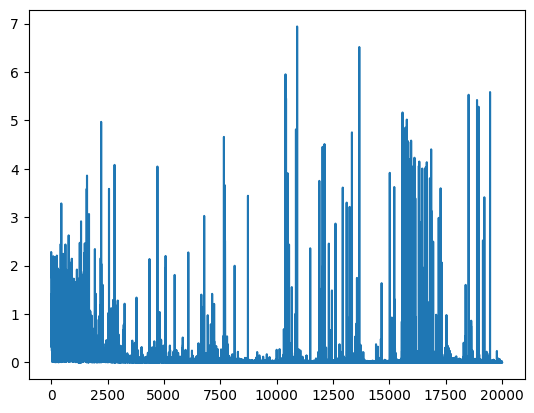

In [407]:
%matplotlib inline
plt.plot(losses)
plt.show()

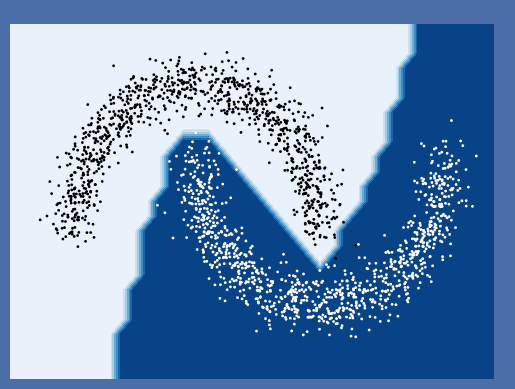

In [408]:
fig, ax = plt.subplots(1, 1, facecolor='#4B6EA9')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plot_decision_boundary(ax, X, Y, model)
fig.canvas.draw()

## 3. Using a Pytorch module

In this last part, use `toch.nn.Module` to recode `MyLinear` and `MyReLU` so that these modules will be pytorch compatible.

## 3.1. Load & Preprocess the IMDB Dataset

In this section, you are required to read and load the provided `csv` file, and perform the preprocessing steps as specified in the assignment's description.

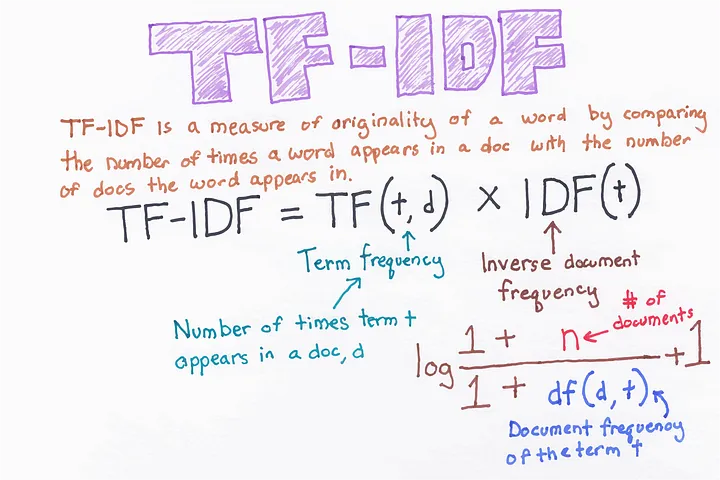

In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import nltk
import re
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

In [155]:
df = pd.read_csv("./imdb_dataset.csv")

## some description of DF

In [156]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Label Encode semantics 

In [203]:
le = LabelEncoder()
df['sentiment_enccode'] = le.fit_transform(df['sentiment'])

In [204]:
df.head()

,review,sentiment,sentiment_enccode,No stopWord
0,One of the other reviewers has mentioned that ...,positive,1,One reviewers mentioned watching Oz episode h...
1,A wonderful little production. <br /><br />The...,positive,1,A wonderful little production br br The filmin...
2,I thought this was a wonderful way to spend ti...,positive,1,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,0,Basically theres family little boy Jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,Petter Matteis Love Time Money visually stunni...


In [205]:
sws = set(stopwords.words('english'))

In [206]:
df['No stopWord'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sws)]))

In [207]:
def remove_special_characters(text):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text


df['No stopWord'] = df['No stopWord'].apply(remove_special_characters)


In [208]:
df['No stopWord'][0]

'One reviewers mentioned watching  Oz episode hooked They right exactly happened mebr br The first thing struck Oz brutality unflinching scenes violence set right word GO Trust me show faint hearted timid This show pulls punches regards drugs sex violence Its hardcore classic use wordbr br It called OZ nickname given Oswald Maximum Security State Penitentary It focuses mainly Emerald City experimental section prison cells glass fronts face inwards privacy high agenda Em City home manyAryans Muslims gangstas Latinos Christians Italians Irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br I would say main appeal show due fact goes shows dare Forget pretty pictures painted mainstream audiences forget charm forget romanceOZ mess around The first episode I ever saw struck nasty surreal I say I ready it I watched more I developed taste Oz got accustomed high levels graphic violence Not violence injustice crooked guards wholl sold nickel inmates wholl kill or

In [209]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [227]:
def tokenize_lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

In [228]:
tokenize_lemmatize("Mahdi has some pictures and cats dogs ")

['Mahdi', 'ha', 'some', 'picture', 'and', 'cat', 'dog']

In [229]:
vectorizer = TfidfVectorizer(max_features=7000 , tokenizer=tokenize_lemmatize)
#counterizer = CountVectorizer (max_features=5000)

In [230]:
vec = vectorizer.fit_transform(df['No stopWord'])
#cnt = counterizer.fit_transform(df['review'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [478]:
result = pd.DataFrame(data=vec.toarray() , columns=vectorizer.get_feature_names_out())
result['__sentiment__'] = df['sentiment_enccode']

In [479]:
result


,a,aaron,abandon,abandoned,abbott,abc,ability,able,aboard,abomination,...,youthful,youtube,youve,yr,z,zero,zombie,zone,zoom,__sentiment__
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1
1,0.099795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1
3,0.091451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.110319,0.0,0.0,0
4,0.043205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.184815,0.0,0.0,0.000000,0.0,0.0,1
49996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0
49997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0
49998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0


In [480]:
vectorizer.get_feature_names_out()

array(['a', 'aaron', 'abandon', ..., 'zombie', 'zone', 'zoom'],
      dtype=object)

In [481]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [482]:
def normalize_text(text, word_to_remove):
    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [w for w in tokens if w.lower() not in stop_words]
    
    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in filtered_words]
    
    # Remove the desired word
    filtered_words = [w for w in stemmed_words if w.lower() != word_to_remove.lower()]
    
    # Join the filtered words back into a sentence
    normalized_text = ' '.join(filtered_words)
    
    return normalized_text

In [483]:
z = result.max()

In [484]:
max(z)

1.0

##  Lemmatization & Stemming 

1 . Stemming:<br>
Stemming is a process of reducing words to their base or root form, called the "stem." It involves removing prefixes and suffixes from words to obtain the core meaning or stem of a word.<b style="color:red;"> The resulting stem may not always be a valid word itself.</b> Stemming algorithms apply various rules and heuristics to perform this truncation.

2 . Lemmatization:
Lemmatization is the process of reducing words to their base or dictionary form, called the "lemma."<b style="color:red;"> Unlike stemming, lemmatization considers the context and meaning of words. It aims to convert words to valid lemmas that exist in a given language's dictionary</b>.

Running -> Run<br>
Jumps -> Jump<br>
Sleeping -> Sleep<br>

In both stemming and lemmatization, the goal is to reduce inflected or derived words to their base or root form. The choice between stemming and lemmatization depends on the specific use case, application requirements, and desired level of word normalization.<b style="color:red;"> Stemming is faster and more aggressive, while lemmatization is slower but yields better results by considering word semantics.

In [485]:
ratio_of_test_train = 0.2


In [489]:
test = result[:int(len(df)*ratio_of_test_train)]

In [490]:
train = result[int(len(df)*ratio_of_test_train) : ]

In [491]:
train

,a,aaron,abandon,abandoned,abbott,abc,ability,able,aboard,abomination,...,youthful,youtube,youve,yr,z,zero,zombie,zone,zoom,__sentiment__
10000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.10728,0.0,0.0,0
10001,0.040891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,1
10002,0.071877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0
10003,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,1
10004,0.019587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.184815,0.0,0.0,0.00000,0.0,0.0,1
49996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0
49997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0
49998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0


In [492]:
test

,a,aaron,abandon,abandoned,abbott,abc,ability,able,aboard,abomination,...,youthful,youtube,youve,yr,z,zero,zombie,zone,zoom,__sentiment__
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
1,0.099795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
3,0.091451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.110319,0.0,0.0,0
4,0.043205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.122648,0.000000,0.0,0.0,1
9996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
9997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
9998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0


In [497]:
def plotDist (data ):
    pos = data['__sentiment__'].sum()
    neg = len(data) - pos 
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    feel = ['Positive' , 'Negative']
    dist = [pos , neg]
    p = ax.bar(feel,dist , color = ['#89ffc8' , 'red'])
    ax.bar_label(p , label_type= 'center')
    plt.show()
    

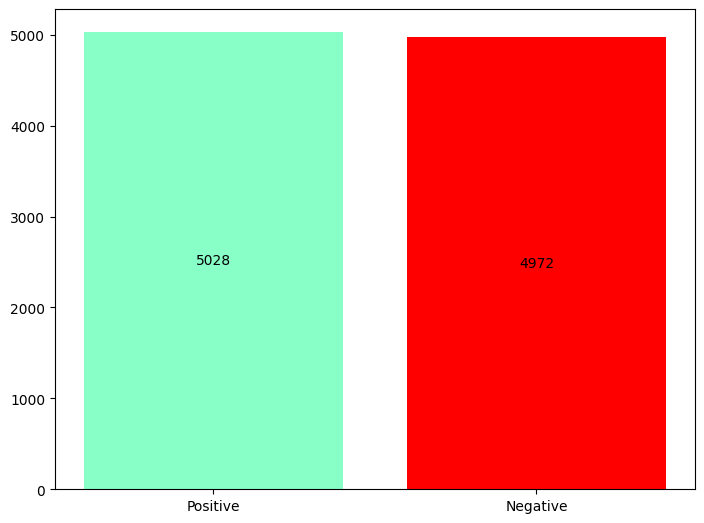

In [498]:
plotDist(test)

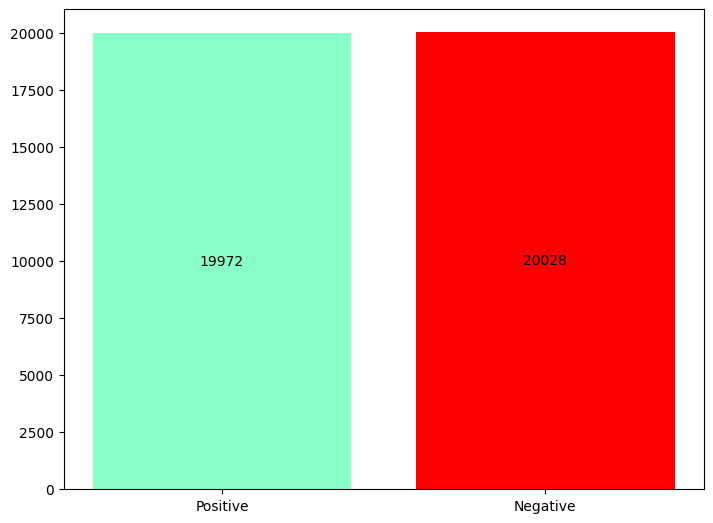

In [499]:
plotDist(train)

## 3.2. MLP in torch

In [553]:
import torch
import torch.nn as nn
import torch.functional as F

# y = Wx + b
class MyLinear_mod(nn.Module):
    def __init__(self, n_input, n_output):
        super(MyLinear_mod, self).__init__()
        # define self.A and self.b the weights and biases
        # initialize them with a normal distribution
        # use nn.Parameters
#         self.W = nn.Parameter(np.random.randn(n_input , n_output))
#         self.b = nn.Parameter(np.random.randn(n_output))
        self.W = nn.Parameter(torch.randn(n_input , n_output))
        self.b = nn.Parameter(torch.randn(n_output))
        
        
    def forward(self, x):
        # YOUR CODE HERE
        return torch.matmul(x , self.W) + self.b
    
    
class MyReLU_mod(nn.Module):
    def __init__(self):
        super(MyReLU_mod, self).__init__()
        
    def forward(self, x):
        # YOUR CODE HERE
        return nn.functional.relu(x)

Define your network using `MyLinear_mod`, `MyReLU_mod` and [`nn.Sigmoid`](https://pytorch.org/docs/stable/nn.html#sigmoid)

In [554]:
# Define your dataloader here (specify your batch_size)
# Use:
from torch.utils.data import TensorDataset, DataLoader
from torch import tensor

# Note that you should transform your X, y to torch.Tensor

batchSize = 64


x = train.drop('__sentiment__', axis=1).values
y = train['__sentiment__'].values

x_tensor = tensor(x, dtype=torch.float32)
y_tensor = tensor(y, dtype=torch.float32)


ds = TensorDataset(x_tensor, y_tensor)
trainLoader = DataLoader(ds , batch_size=batchSize)




In [555]:
# define your network with nn.Sequential
# use MyLinear_mod, MyReLU_mod and nn.Sigmoid (from pytorch)


featureNumber = result.shape[1]

myNet = nn.Sequential(
    MyLinear_mod(featureNumber-1 , 64),
    MyReLU_mod(),
    MyLinear_mod(64 , 64),
    nn.Sigmoid(),
    MyLinear_mod(64 , 1),
    nn.Sigmoid()

)



In [558]:
from torch import optim

from torch.utils.data import TensorDataset, DataLoader
import sklearn

def trainTestModel (yourTorchNetwork , trainData , testData , epochs , leaningRate):
    optimizer = optim.SGD(yourTorchNetwork.parameters(), lr = leaningRate)

    losses = []
    criterion = nn.BCELoss()
    
    for epoch in range(epochs):
        running_loss = 0.0
        # You can print epoch No. and train/test accuracy here (after each epoch)
        for i, d in enumerate(trainData, 0):
            # do a forward pass on the batch
            # YOUR CODE HERE
            inputData = d[0]
            labels = d[1]
            
            
            output = yourTorchNetwork(inputData)
            # compute the loss according to your output and the label
            # YOUR CODE HERE
            loss = criterion(output, labels.view(-1, 1))
            
            # zero the gradients
            # YOUR CODE HERE
            optimizer.zero_grad()

            # backward pass
            loss.backward()
            # gradient step
            # YOUR CODE HERE
            optimizer.step()
            
            

            
            # Calculate statistics
            running_loss += loss.item()
            if i % 500 == 499:    # every 500 mini-batches
                losses.append(running_loss / 500)
                running_loss = 0.0

                
    plt.plot(losses)
    plt.show()
    
    
    
    x_test = testData.drop('__sentiment__', axis=1).values
    y_test = testData['__sentiment__'].values
    
    
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    y_test_pred = yourTorchNetwork(x_test_tensor).detach().numpy().round()
    
    print(sklearn.metrics.classification_report(y_test, y_test_pred))

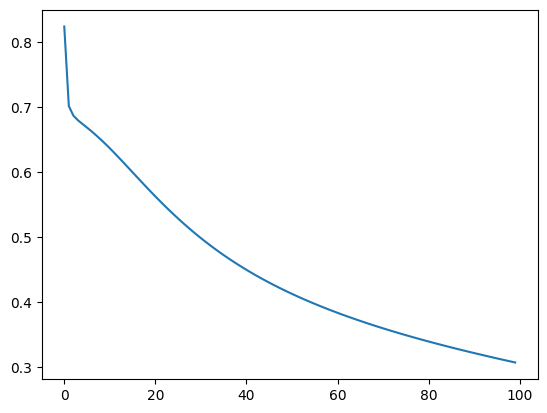

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4972
           1       0.84      0.82      0.83      5028

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [559]:
trainTestModel (myNet , trainLoader , test , 100 , 0.1)

## Wighting Our Network 

### if all first inital wieght be 0 :

####  Initializing all weights in a neural network to 0 can lead to several issues. Firstly, it causes a symmetry breaking problem where all neurons produce the same output, preventing the network from effectively learning complex patterns.

#### Secondly, it limits the expressiveness of the network as each neuron becomes identical, losing its capacity to represent diverse features and relationships in the data.

#### Additionally, the lack of differentiation between neurons hinders the network's ability to learn and discriminate between different features. 

#### Moreover, initializing all weights to 0 increases the likelihood of getting stuck in local optima during training, as there is no initial diversity in the weights. 

#### To overcome these issues, it is advisable to initialize the weights with random values using techniques like Xavier or He initialization, which promote diversity, symmetry breaking, and facilitate the learning process in neural networks.

# Learning Rate

In [566]:
myNet2 = nn.Sequential(
    MyLinear_mod(featureNumber-1 , 64),
    MyReLU_mod(),
    MyLinear_mod(64 , 64),
    nn.Sigmoid(),
    MyLinear_mod(64 , 1),
    nn.Sigmoid()

)


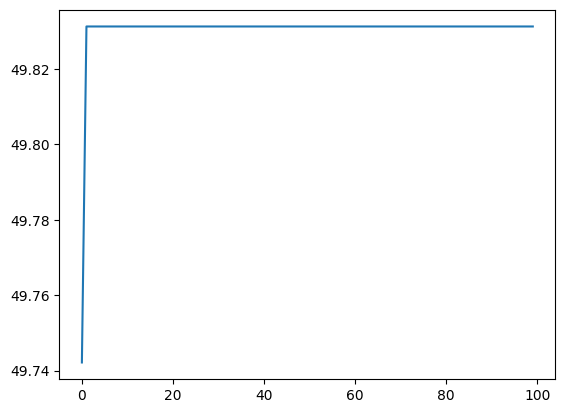

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      4972
           1       0.00      0.00      0.00      5028

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [567]:
trainTestModel (myNet2 , trainLoader , test , 100 , 10)

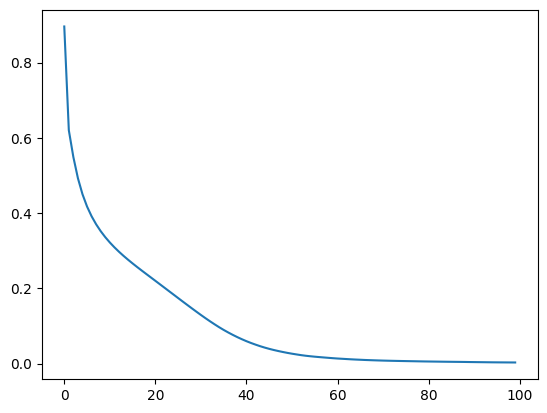

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4972
           1       0.86      0.85      0.85      5028

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [571]:
myNet3 = nn.Sequential(
    MyLinear_mod(featureNumber-1 , 64),
    MyReLU_mod(),
    MyLinear_mod(64 , 64),
    nn.Sigmoid(),
    MyLinear_mod(64 , 1),
    nn.Sigmoid()

)

trainTestModel (myNet3 , trainLoader , test , 100 , 1)

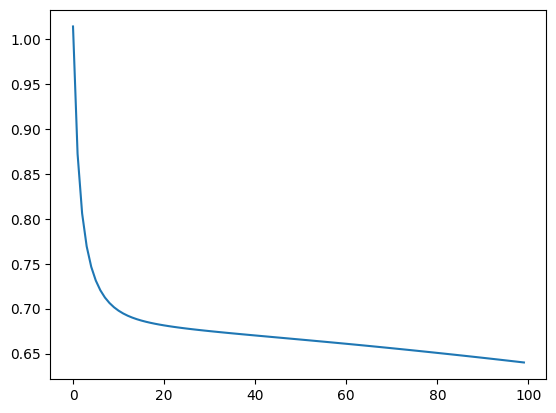

              precision    recall  f1-score   support

           0       0.62      0.63      0.63      4972
           1       0.63      0.62      0.63      5028

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



In [575]:
myNet5 = nn.Sequential(
    MyLinear_mod(featureNumber-1 , 64),
    MyReLU_mod(),
    MyLinear_mod(64 , 64),
    nn.Sigmoid(),
    MyLinear_mod(64 , 1),
    nn.Sigmoid()

)

trainTestModel (myNet5 , trainLoader , test , 100 , 0.01)

## ACTIOVATION FUNCTIONS

### Activation functions determine the output of a neuron based on its input. They transform the input signal into a desired output signal, which is then passed to the next layer of the network

# ALL RELU

In [569]:
myNet4 = nn.Sequential(
    MyLinear_mod(featureNumber-1 , 64),
    MyReLU_mod(),
    MyLinear_mod(64 , 64),
    MyReLU_mod(),
    MyLinear_mod(64 , 1),
    nn.Sigmoid()

)



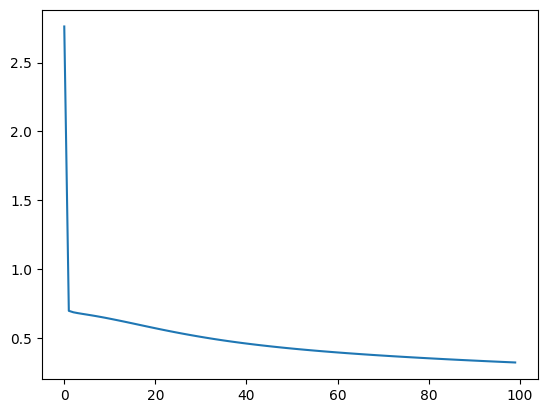

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      4972
           1       0.83      0.82      0.83      5028

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [570]:
trainTestModel (myNet4 , trainLoader , test , 100 , 0.1)

# ALL Tanh

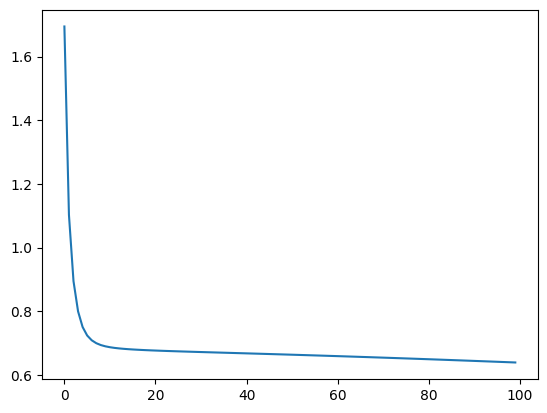

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      4972
           1       0.64      0.61      0.62      5028

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



In [573]:
myNet6 = nn.Sequential(
    MyLinear_mod(featureNumber-1 , 64),
    nn.Tanh(),
    MyLinear_mod(64 , 64),
    nn.Tanh(),
    MyLinear_mod(64 , 1),
    nn.Sigmoid()

)

trainTestModel (myNet6 , trainLoader , test , 100 , 0.01)

# ALL LEAKLY RELU

### $$f(x) = max(ax, x)
$$


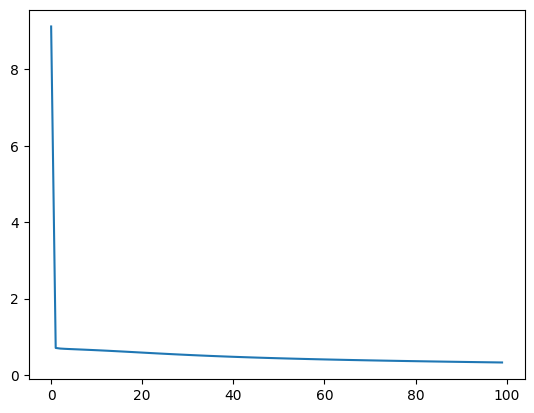

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4972
           1       0.82      0.83      0.82      5028

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [574]:
myNet7 = nn.Sequential(
    MyLinear_mod(featureNumber-1 , 64),
    nn.LeakyReLU(),
    MyLinear_mod(64 , 64),
    nn.LeakyReLU(),
    MyLinear_mod(64 , 1),
    nn.Sigmoid()

)

trainTestModel (myNet7 , trainLoader , test , 100 , 0.1)

# WHY SIGMOID AND TANH ARE NOT GOOD CHOICE FOR HL ?

#### Sigmoid and tanh activation functions are not always the best choices for hidden layers in neural networks because of a phenomenon called "vanishing gradient." 
#### Both sigmoid and tanh functions saturate at the extreme ends of their input range, leading to very small gradients. This means that during backpropagation, the gradients of the weights in the earlier layers become extremely small, making it difficult for the network to learn effectively.

#### In contrast, activation functions like ReLU (Rectified Linear Unit) are preferred for hidden layers due to their ability to alleviate the vanishing gradient problem. ReLU has a non-saturating nature and provides a simple thresholding behavior, allowing gradients to flow more freely and enabling faster learning. 
#### Additionally, ReLU promotes sparsity in the network by zeroing out negative values, which can enhance the network's ability to model complex patterns.



# WHY LEAKY ReLU IS BETTER THAN ReLU

#### Leaky ReLU is preferred over ReLU because it avoids the "dying ReLU" problem by allowing a small, non-zero output for negative inputs. This ensures that neurons remain active and contribute to the learning process.
#### Leaky ReLU also helps solve the vanishing gradient problem and retains the positive bias of ReLU. The choice of activation function depends on the task and data characteristics, but Leaky ReLU is a popular choice to address the limitations of ReLU.

# BATCH SIZE

## usually we prefer the batch size be power of 2

### size = 16

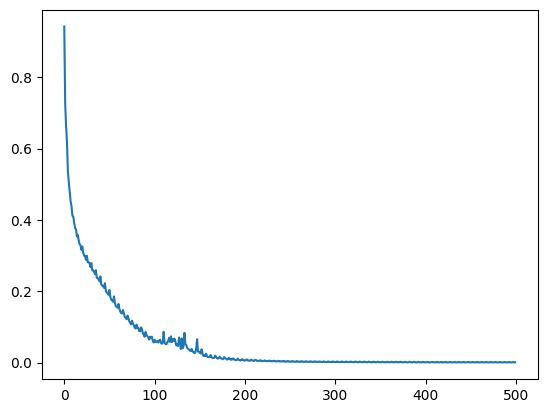

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4972
           1       0.87      0.88      0.87      5028

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [576]:

batchSize = 16


x = train.drop('__sentiment__', axis=1).values
y = train['__sentiment__'].values

x_tensor = tensor(x, dtype=torch.float32)
y_tensor = tensor(y, dtype=torch.float32)


ds = TensorDataset(x_tensor, y_tensor)
trainLoader = DataLoader(ds , batch_size=batchSize)


myNet3 = nn.Sequential(
    MyLinear_mod(featureNumber-1 , 64),
    MyReLU_mod(),
    MyLinear_mod(64 , 64),
    nn.Sigmoid(),
    MyLinear_mod(64 , 1),
    nn.Sigmoid()

)

trainTestModel (myNet3 , trainLoader , test , 100 , 1)


### Size = 256

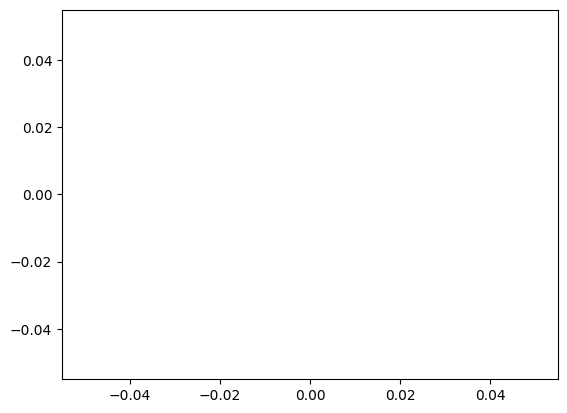

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4972
           1       0.85      0.82      0.83      5028

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [577]:

batchSize = 256


x = train.drop('__sentiment__', axis=1).values
y = train['__sentiment__'].values

x_tensor = tensor(x, dtype=torch.float32)
y_tensor = tensor(y, dtype=torch.float32)


ds = TensorDataset(x_tensor, y_tensor)
trainLoader = DataLoader(ds , batch_size=batchSize)


myNet3 = nn.Sequential(
    MyLinear_mod(featureNumber-1 , 64),
    MyReLU_mod(),
    MyLinear_mod(64 , 64),
    nn.Sigmoid(),
    MyLinear_mod(64 , 1),
    nn.Sigmoid()

)

trainTestModel (myNet3 , trainLoader , test , 100 , 1)



The batch size is an important hyperparameter that can affect the performance of the model.

## BIG BATCH

A larger batch size can lead to faster training times, but it can also lead to overfitting and poor generalization performance. 

## LITTLE BATCH

A smaller batch size can lead to slower training times, but it can also lead to better generalization performance.



In general, the batch size should be chosen based on the available computational resources and the size of the dataset. A common batch size is 32 or 64, but larger or smaller batch sizes may be appropriate depending on the specific problem.


### Advantages of large batch size:

1 - Improved computational efficiency: Large batch sizes allow for better utilization of hardware resources such as GPUs, as they can process larger batches of data in parallel, resulting in faster training times.


2 - Smoother convergence: Large batch sizes can provide a more stable and smoother convergence during training, as the gradient estimation becomes more accurate with larger sample sizes.


3 - Regularization effect: Large batch sizes can act as a form of regularization by reducing the impact of noisy or outlier samples in the training process.

### Disadvantages of large batch size:

1 - Memory requirements: Large batch sizes require more memory to store the intermediate activations and gradients, which can be a limitation in memory-constrained environments.


2 - Slower updates: Large batch sizes result in fewer parameter updates per epoch, which can slow down the learning process and lead to slower convergence.


3 - Potential for getting stuck in poor local optima: Large batch sizes may limit the exploration of the parameter space, potentially causing the model to get stuck in poor local optima and hindering its ability to find the global optimum.`

### Advantages of small batch size:

1 - Better generalization: Small batch sizes can lead to better generalization as they allow the model to update its parameters more frequently, enabling it to quickly adapt to new patterns in the data.


2 - Enhanced exploration: Small batch sizes enable the model to explore different areas of the parameter space more thoroughly, potentially allowing it to escape poor local optima and find better solutions.


3 - Lower memory requirements: Small batch sizes consume less memory, making them suitable for training on limited memory devices.

### Disadvantages of small batch size:

1 - Increased noise in gradient estimation: Small batch sizes result in noisier gradient estimates due to the limited number of samples, which can lead to slower convergence or suboptimal solutions.


2 - Reduced computational efficiency: Small batch sizes may underutilize the available hardware resources, especially in parallel computing environments like GPUs, resulting in slower training times.


3 - Increased parameter update variability: Small batch sizes can introduce more variability in parameter updates, which can make training less stable and require careful tuning of learning rates.